# Le problème stationnaire de convection 2D

## Description du problème

On considère ici le problème stationnaire de convection de la quantité $\phi$ en 2D, régit par l'équation aux dérivées partielles suivante:

$$\frac{\partial}{\partial x} (u \phi) + \frac{\partial}{\partial y} (v \phi) = 0$$
où 
$$u=U_0 \quad v=U_0$$

Pour illustrer le problème de diffusion numérique dite aussi "fausse diffusion" introduite par le schéma numérique considérons le pb de transport d'un scalaire dans un domaine où l'écoulement arrive angulairement à ce dernier. 

Seulement de la convection pure (pas de diffusion physique) est considérée ici afin de mettre en évidence la **diffusion numérique**.


![Image](Images/convection_diffusion_upwind_diffusion_2D_mesh.png)

Avec ces conditions aux limites et en l'absence de diffusion, la solution attendue est donnée par :

![Image](Images/convection_diffusion_upwind_diffusion_2D_mesh_solution.png)



## Intégration sur un volume de contrôle

Pour obtenir l'équation aux volumes finis, l'équation  est intégrée sur un volume de contrôle 2D :

\begin{equation}
 h \int_{y_{j - 1 / 2}}^{y_{j + 1 / 2}}\int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \left[\frac{\partial ( u \phi)}{\partial x} +\frac{\partial(v \phi)}{\partial y} \right]  dx dy = 0 
\end{equation}

### Terme convectif associé à la composante $u$

On a :

$$ \int_{y_{j - 1 / 2}}^{y_{j + 1 / 2}}\int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial ( u \phi)}{\partial x} dx dy =  \Delta y\left[(u \phi)_{i+1/2,j} - (u \phi)_{i-1/2,j}\right]$$ 

Mais celà nécessite de calculer les valeurs de $u\phi$ sur les faces des volumes de contrôles alors que la valeur n'est calculée uniquement qu'au centre d'abscisse $x_i$.

Une methode simple consiste à évaluer les valeurs aux centres des faces en fonctions de valeurs aux noeuds par une interpolation __upwind__. 

La vitesse $u>0$, il vient :

$$(u\phi)_{i - 1 / 2,j} =  (u\phi)_{i-1,j}$$

$$(u\phi)_{i + 1 / 2,j} =  (u\phi)_{i,j}$$

### Terme convectif associé à la composante $v$ (exercice personnel)

L'intégration de $\displaystyle{\frac{\partial(v \phi)}{\partial y}}$  est similaire.

###  Ecriture des équations algébriques

En substituant ces approximations dans l'eq. de départ, il vient :

$$
\Delta y u_{i,j}\phi_{i,j}-\Delta y u_{i-1,j}\phi_{i-1,j} + \Delta x v_{i,j}\phi_{i,j}-\Delta x u_{i,j-1}\phi_{i,j-1}=0
$$

Qui peut alors s'écrire :

$$
a_{i,j}\phi_{i,j}=a_{i-1,j}\phi_{i-1}+a_{i,j-1}\phi_{i,j-1}
$$

Avec : 

$$a_{i-1,j} = u_{i-1,j}\Delta y$$
$$a_{i,j} = u_{i,j}\Delta y + v_{i,j}\Delta x$$
$$a_{i,j-1} = v_{i,j-1}\Delta x$$

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convection_2D_steady(Lx,Ly,Nx,Ny,U0,phi_A,phi_B):
    # Creation du maillage
    dx = Lx / (Nx -1) # Pas d'espace suivant x
    dy = Ly / (Ny -1) # Pas d'espace suivant y

    x = np.linspace(0,Lx,Nx) # Maillage suivant x
    y = np.linspace(0,Ly,Ny) # Maillage suivant y

    # Champ de vitesse
    u = U0*np.ones((Nx, Ny))
    v = U0*np.ones((Nx, Ny))

    # Initialize solution
    phi = np.zeros((Nx, Ny))
    phi_new = np.zeros((Nx, Ny))

    # Conditions aux limites
    phi[-1,:] = phi_B
    phi[:,0] = phi_B
    phi[:,-1] = phi_A
    phi[0,:] = phi_A

    #
    # Calcul de la solution
    #
    NIterGaussSeidel  = 100

    for n in range(NIterGaussSeidel): # just use a number of iterations for the Gauss-Seidel
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                aip1j = 0 
                aim1j = u[i-1,j]*dy
                aijp1 = 0
                aijm1 = v[i,j-1]*dx
                aij =  u[i,j]*dy + v[i,j]*dx
                phi[i,j] = (aim1j * phi[i-1,j] + aip1j * phi[i+1,j] + aijp1 * phi[i,j+1] + aijm1 * phi[i,j-1] ) / aij
    
    return x,y,u,v,phi

In [3]:
# Paramètres physiques
U0 = 1

Lx = 1
Ly = 1 

Nx = 25 # Nbr de noeuds suivant x
Ny = Nx # Nbr de noeuds suivant y

Nx1 = 50
Ny1 = Nx1

Nx2 = 100
Ny2 = Nx2

phi_A = 1
phi_B = 0

In [4]:
# Calcul de la solution pour différents mailages
x,y,u,v,phi = convection_2D_steady(Lx,Ly,Nx,Ny,U0,phi_A,phi_B)
x1,y1,u1,v1,phi1 = convection_2D_steady(Lx,Ly,Nx1,Ny1,U0,phi_A,phi_B)
x2,y2,u2,v2,phi2 = convection_2D_steady(Lx,Ly,Nx2,Ny2,U0,phi_A,phi_B)

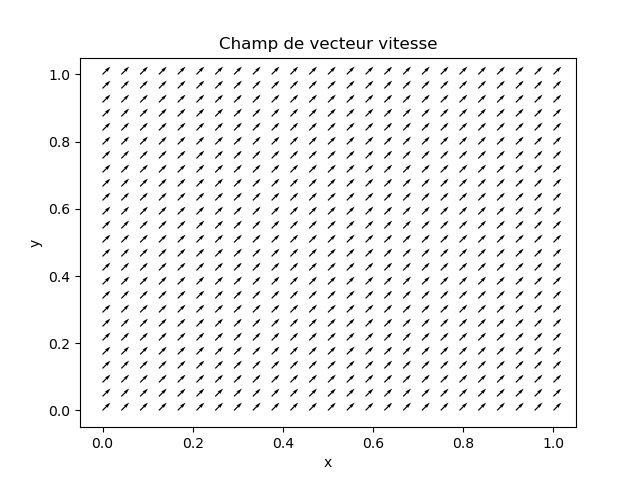

In [5]:
# Affichage du champ de vecteur vitesse
plt.figure(1).clear()
plt.quiver(x,y,u.T,v.T)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Champ de vecteur vitesse")
plt.show()

## Influence du maillage sur la diffusion numérique

On peut observer l'influence du maillage sur la diffusion numérique en modifiant la taille des mailles.

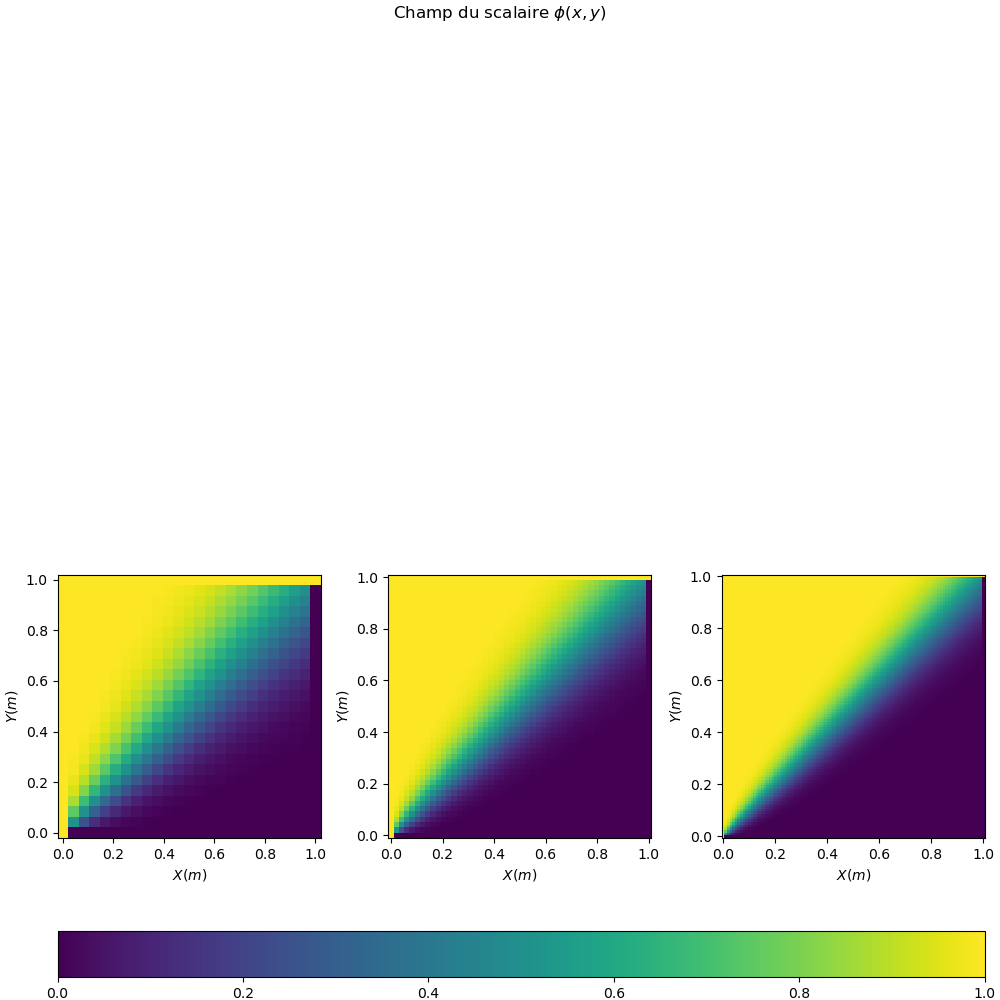

In [6]:
# Champ du scalaire $\phi$
fig2, ax = plt.subplots(1, 3, layout='constrained', figsize=(10,10))

pcm = ax[0].pcolormesh(x, y, phi.T)
ax[0].set_xlabel('$X(m)$')
ax[0].set_ylabel('$Y(m)$')
ax[0].set_aspect('equal')
# fig.colorbar(pcm,ax=ax[0])

pcm = ax[1].pcolormesh(x1, y1, phi1.T)
ax[1].set_xlabel('$X(m)$')
ax[1].set_ylabel('$Y(m)$')
ax[1].set_aspect('equal')
# fig.colorbar(pcm,ax=ax[1])

pcm =ax[2].pcolormesh(x2, y2, phi2.T)
ax[2].set_xlabel('$X(m)$')
ax[2].set_ylabel('$Y(m)$')
ax[2].set_aspect('equal')
# fig.colorbar(pcm,ax=ax[2])

fig2.colorbar(pcm,ax=ax, orientation="horizontal")  
fig2.suptitle(r"Champ du scalaire $\phi(x,y)$")

plt.show()

Pour avoir des informations quantitatives sur la diffusion numérique, on peut tracer la distribution de la quantité $\phi$ le long d'une ligne horizontale au milieu du domaine, par exemple en $x=L_x/2$.

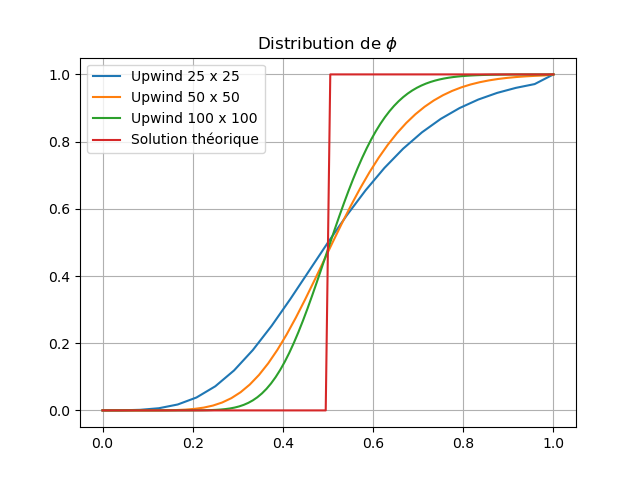

In [7]:
# Affichage de la distribution de $\phi$
plt.figure()
plt.plot(y,phi[int(Nx/2),:],label="Upwind "+str(Nx)+" x "+str(Ny))
plt.plot(y1,phi1[int(Nx1/2),:], label="Upwind "+str(Nx1)+" x "+str(Ny1))
plt.plot(y2,phi2[int(Nx2/2),:], label="Upwind "+str(Nx2)+" x "+str(Ny2))
plt.plot(y2,1*(y2>=Ly/2), label="Solution théorique")
plt.grid()
plt.legend()
plt.title(r"Distribution de $\phi$")
plt.show()